___

<p style="font-size:xx-large; font-weight: bold; line-height: 1.2;">
    City of Tucson's Climate Action and Adaptation Plan Community Survey
</p>

___

**Preguntas abiertas:**

Do you have other climate mitigation ideas? Submit here:

Do you have other climate adaptation ideas? Submit here:

Do you have other ideas for environmental equity, justice, and community resilience? Submit here:

Do you have other policy ideas? Submit here:

Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:

Is there anything else you would like to share that was not already addressed?

# Preparación de los datos

## Lectura del dataset

In [1]:
import pandas as pd

# Lee el dataset.
df = pd.read_csv(r'tucson-caapcs-2021-05-13-20-45_2.csv', encoding='latin-1')

In [2]:
# Declara los nuevos nombres para las columnas de interés.
new_col_names = {
    'Do you have other climate mitigation ideas? Submit here:': 'climate_mitigation_ideas',
    'Do you have other climate adaptation ideas? Submit here:': 'climate_adaptation_ideas',
    'Do you have other ideas for environmental equity, justice, and community resilience? Submit here:': 'environmental_equity_ideas',
    'Do you have other policy ideas? Submit here:': 'policy_ideas',
    'Are you interested in participating in any other ways to help make Tucson environmentally sustainable? Submit here:': 'environment_sustainable_ideas',
    'Is there anything else you would like to share that was not already addressed?': 'other_ideas',
}

# Renombra las columnas.
df.rename(columns=new_col_names, inplace=True)

In [3]:
# Declara los nombres de las columnas.
columns = [
    'climate_mitigation_ideas',
    'climate_adaptation_ideas',
    'environmental_equity_ideas',
    'policy_ideas',
    'environment_sustainable_ideas',
    'other_ideas'
]

# Crea una copia del dataframe que solo incluya las columnas deseadas.
df = df[columns].copy()

In [4]:
# Muestra algunos ejemplos de registros.
df.head(5)

climate_mitigation_ideas climate_adaptation_ideas  \
0  Re-engineer parking areas to reduce asphalt th...                      NaN   
1                                                NaN                      NaN   
2                                                NaN                      NaN   
3                                                NaN                      NaN   
4                                                NaN                      NaN   

                          environmental_equity_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  solar and rainwater harvesting are very differ...   
4                                                NaN   

                                        policy_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  It should not be just drought resistant, but n...   
4                                                NaN   

                       environment_sustainable_ideas  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  You ought to be paying more attention to natur...   
4                                                NaN   

                                         other_ideas  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  Sustainability involves planning for nature, n...  
4                                                NaN

# Preparación y limpieza de datos

In [5]:
# Esta celda contiene funciones de utilidad para la preparación de los datos para el
# análisis de texto.

import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Descarga los elementos de NLTK necesarios.
nltk.download([
    "names",
    "stopwords",
    "state_union",
    "twitter_samples",
    "movie_reviews",
    "averaged_perceptron_tagger",
    "vader_lexicon",
    "punkt",
])

def get_unwanted_words():
    """
    Genera la lista de palabras irrelevantes para el análisis de sentimientos y que 
    por tanto se ignorarán. Entre estos tipos de palabras se encuentran artículos, 
    pronombres, preposiciones, conjunciones y palabras definidas por nosotros mismos.
    """
    unwanted = nltk.corpus.stopwords.words("english")
    unwanted.extend([w.lower() for w in nltk.corpus.names.words()])
    unwanted.extend(['tucson', 'city', 'people'])
    return unwanted


def get_column_clean_copy(dataframe, column_name):
    """
    Copia y limpia los valores de una columna en un dataframe nuevo.
    """
    df_copy = dataframe[[column_name]].copy()
    df_copy = df_copy.replace(r'\n', ' ', regex=True) 
    df_copy = df_copy.replace(r'^\s*no\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*NO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*No\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*nO\s*$', '', regex=True)
    df_copy = df_copy.replace(r'^\s*-\s*$', '', regex=True)
    nan_value = float("NaN")
    df_copy.replace('', nan_value, inplace=True)
    df_copy = df_copy.dropna()
    return df_copy


def filter_words_array(words, unwanted_words):
    """
    Filtra una lista de palabras de acuerdo a una lista establecida y otros
    parámetros utilizados para dejar solamente palabras útiles para el
    análisis de texto.
    """
    # Elimina palabras no deseadas.
    words = [w.lower() for w in words if w.lower() not in unwanted_words]
    # Elimina tokens no alfabéticos.
    words = [w.lower() for w in words if w.isalpha()]
    return words


def create_word_cloud(words, title=None):
    """
    Genera una wordcloud a partir de una lista de palabras.
    Esta función no realiza filtros de unwanted words, las
    palabras que se manden ya deben estar filtradas.
    """
    if len(words) == 0:
        words = ['NONE']
        
    # Concatena los tokens para formar una sola cadena
    text = ', '.join([word for word in words])

    # Configura la wordcloud
    wordcloud = WordCloud(width=1500, height=500,
                          background_color='white',
                          min_font_size=10).generate(text)

    # Muestra la wordcloud
    plt.figure(figsize=(15, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    if title is not None:
        plt.title(title, fontdict={
                  'family': 'sans', 'color': 'black', 'size': 50}, pad=20)
    plt.show()
    return wordcloud

[nltk_data] Downloading package names to /home/porfirio/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/porfirio/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/porfirio/nlt

In [6]:
unwanted_words = get_unwanted_words()

# Algoritmos de análisis de sentimientos

## VADER

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sia.polarity_scores(str(text))['compound']

## Textblob

In [8]:
from textblob import TextBlob

def get_textblob_score(text):
    return TextBlob(text).sentiment.polarity

## IBM Watson

In [9]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions


def get_ibmwatson_score(text):
    # Inicializa autenticador para la API de IBM.
    authenticator = IAMAuthenticator(
        'Keolj04gR6No5O3s36YIuYpSrHO1qbwHBVF2koYAdlKn'
    )

    # Inicializa el analizador.
    natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2020-08-01',
        authenticator=authenticator,
    )

    # Establece la URL del analizador.
    natural_language_understanding.set_service_url(
        'https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/ad75e4da-163f-4ebc-aedd-9324258d41c7'
    )
    
    # Realiza el análisis
    response = natural_language_understanding.analyze (
        text = text,
        features = Features(sentiment=SentimentOptions()),
        language = 'en'
    ).get_result()
    
    # Extrae el score del resultado del análisis
    res = response.get('sentiment').get('document').get('score')
    return res

## Textblob Naive Bayes

In [31]:
from textblob.sentiments import NaiveBayesAnalyzer


def get_textblob_nb_score(text):
    sentiment = TextBlob(text, analyzer=NaiveBayesAnalyzer()).sentiment
    pos_score = sentiment.p_pos
    neg_score = sentiment.p_neg
    score_dif = pos_score - neg_score
    
    if (abs(pos_score - neg_score) <= 0.15):
        return score_dif
    
    if (pos_score > neg_score):
        return pos_score
    
    return - neg_score

## Logistic Regression

In [ ]:
def get_logistic_regression_score(text):
    pass

# Análisis de sentimientos

## Definición de utilidades

In [10]:
##################################################################
import operator


def group_by_sentiment_probabilities(dataframe, column_name):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento
    por medio de las probabilidades. Solo aplica para el VADER.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = sia.polarity_scores(str(text))
        del score['compound']
        sentiment = max(score.items(), key=operator.itemgetter(1))[0]

        if sentiment == 'pos':
            pos_answers.append(text)
        elif sentiment == 'neg':
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)
##################################################################


def group_by_sentiment_compound(dataframe, column_name, classifier):
    """
    Agrupa los textos de la columna de acuerdo a su sentimiento
    de acuerdo al score que arroja el clasificador.
    """
    pos_answers = []
    neg_answers = []
    neu_answers = []

    for text in dataframe[column_name]:
        score = classifier(str(text))

        if score > 0.15:
            pos_answers.append(text)
        elif score < -0.15:
            neg_answers.append(text)
        else:
            neu_answers.append(text)

    return (pos_answers, neg_answers, neu_answers)


def generate_sentiment_word_cloud(texts, title = ''):
    """
    Genera una wordcloud a partir de un arreglo de textos.
    """
    # Extrae las palabras de la pregunta.
    words = nltk.word_tokenize(', '.join(str(item) for item in texts))
    # Filtra las palabras de acuerdo a palabras indeseadas.
    words = filter_words_array(words, unwanted_words)
    # Genera la word cloud.
    wc = create_word_cloud(words, f'{title}')

## Uso de los clasificadores

In [141]:
# TODO: Hacerlo con cada una de las 6 columnas.
df_tmp = get_column_clean_copy(df, 'other_ideas')

In [ ]:
result_vader = group_by_sentiment_compound(df_tmp, 'other_ideas', get_vader_score)
result_textblob = group_by_sentiment_compound(df_tmp, 'other_ideas', get_textblob_score)
result_watson = group_by_sentiment_compound(df_tmp, 'other_ideas', get_ibmwatson_score)
result_textnaive = group_by_sentiment_compound(df_tmp, 'other_ideas', get_textblob_nb_score)

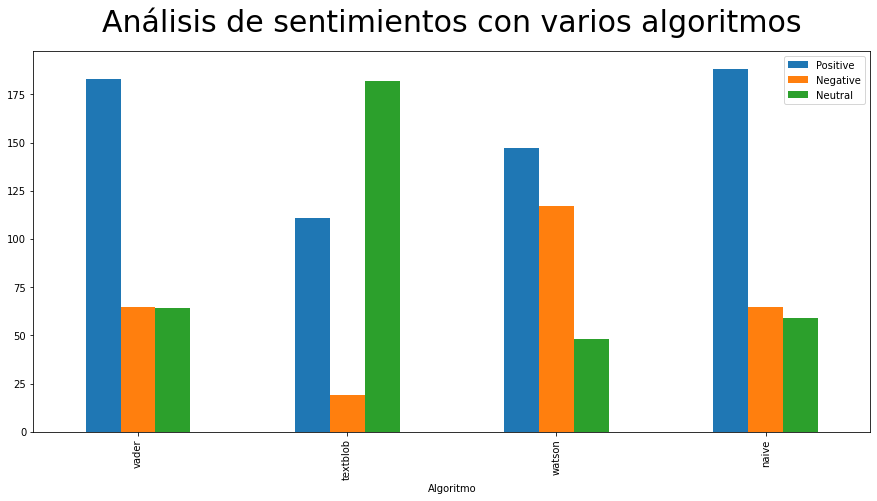

In [142]:
results = [
    [
        'vader',
        len(result_vader[0]),
        len(result_vader[1]),
        len(result_vader[2])
    ],
    [
        'textblob',
        len(result_textblob[0]),
        len(result_textblob[1]),
        len(result_textblob[2])
    ],
    [
        'watson',
        len(result_watson[0]),
        len(result_watson[1]),
        len(result_watson[2])
    ],
    [
        'naive',
        len(result_textnaive[0]),
        len(result_textnaive[1]),
        len(result_textnaive[2])
    ]
]

results_df = pd.DataFrame(results, columns=['Algoritmo', 'Positive', 'Negative', 'Neutral'])
results_df.plot(kind='bar', x='Algoritmo', stacked=False, figsize=(15, 7))
title = 'Análisis de sentimientos con varios algoritmos'
plt.title(title, fontdict={'family': 'sans', 'color': 'black', 'size': 30}, pad=20)
plt.show()

## Ensemble techniques

In [38]:
from collections import Counter
  
def most_frequent(items):
    occurence_count = Counter(items)
    return occurence_count.most_common(1)[0][0]

def generate_classified_dataframe(dataframe, column_name):
    data = []
    
    for text in dataframe[column_name]:
        scores = [
            get_vader_score(str(text)),
            get_textblob_score(str(text)),
            get_ibmwatson_score(str(text)),
            get_textblob_nb_score(str(text)),
        ]
        
        for i in range(len(scores)):
            if scores[i] > 0.15:
                scores[i] = 1
            elif scores[i] < -0.15:
                scores[i] = -1
            else:
                scores[i] = 0
        
        data.append([
            text,
            scores[0],
            scores[1],
            scores[2],
            scores[3],
            most_frequent(scores)
        ])
            
    return pd.DataFrame(data, columns=['Answer', 'Vader', 'Textblob', 'Watson', 'Naive', 'MaxVoting'])

# TODO: Aquí separar respuestas positivas, negativas y neutrales para la generación de las wordclouds.

In [39]:
classified_df = generate_classified_dataframe(df_tmp, 'other_ideas')
classified_df

Answer  Vader  Textblob  \
0    Sustainability involves planning for nature, n...      0         0   
1    The city can't even take care of issues that p...     -1         0   
2    Water is a much bigger problem than this surve...      0         1   
3    As much as climate change is important, I am m...     -1         1   
4    In my neighborhood, infill has become instuff....      1         0   
..                                                 ...    ...       ...   
307  Thank you for doing this. I just moved to Tucs...      1         1   
308  City "Leaders" need to lead by example. For in...      1         1   
309                                  not at the moment      0         0   
310  Subsidizing solar for individual dwellings may...      1         0   
311  City transit is very wasteful in most parts of...      1         0   

     Watson  Naive  MaxVoting  
0        -1      0          0  
1        -1      1         -1  
2        -1     -1         -1  
3        -1     -1         -1  
4        -1      1          1  
..      ...    ...        ...  
307       1      0          1  
308       1      1          1  
309      -1      0          0  
310       1      0          1  
311      -1     -1         -1  

[312 rows x 6 columns]

In [40]:
classified_df.head(15)

Answer  Vader  Textblob  \
0   Sustainability involves planning for nature, n...      0         0   
1   The city can't even take care of issues that p...     -1         0   
2   Water is a much bigger problem than this surve...      0         1   
3   As much as climate change is important, I am m...     -1         1   
4   In my neighborhood, infill has become instuff....      1         0   
5   Great that you are seeking community input, bu...      1         0   
6   The community I am in Armory Park Del Sol has ...      1         1   
7                            Thank you for your work!      1         0   
8   Do not use the planting trees and green spaces...     -1         0   
9                              Cleanup old landfills.      0         0   
10                    Thank you creating this survey!      1         0   
11  just FYI -- we participated in the cities reba...      1         1   
12  Thank you for your efforts to reach out to the...      1         0   
13  You would have my full support to implement AL...      1         1   
14  You are preparing to shove onerous new guideli...      0         0   

    Watson  Naive  MaxVoting  
0       -1      0          0  
1       -1      1         -1  
2       -1     -1         -1  
3       -1     -1         -1  
4       -1      1          1  
5        1      1          1  
6        1      1          1  
7        1      0          1  
8        1      1          1  
9        0     -1          0  
10       1     -1          1  
11      -1      0          1  
12       1      1          1  
13       1      1          1  
14      -1      0          0

### Max voting

In [53]:
# Separación de respuestas por sentimiento según el resultado de los votos.

mv_pos = []
mv_neg = []
mv_neu = []

for index, row in classified_df.iterrows():
    if row['MaxVoting'] == 1:
        mv_pos.append(row['Answer'])
    elif row['MaxVoting'] == -1:
        mv_neg.append(row['Answer'])
    else:
        mv_neu.append(row['Answer'])

## Wordclouds por sentimiento

### Other ideas

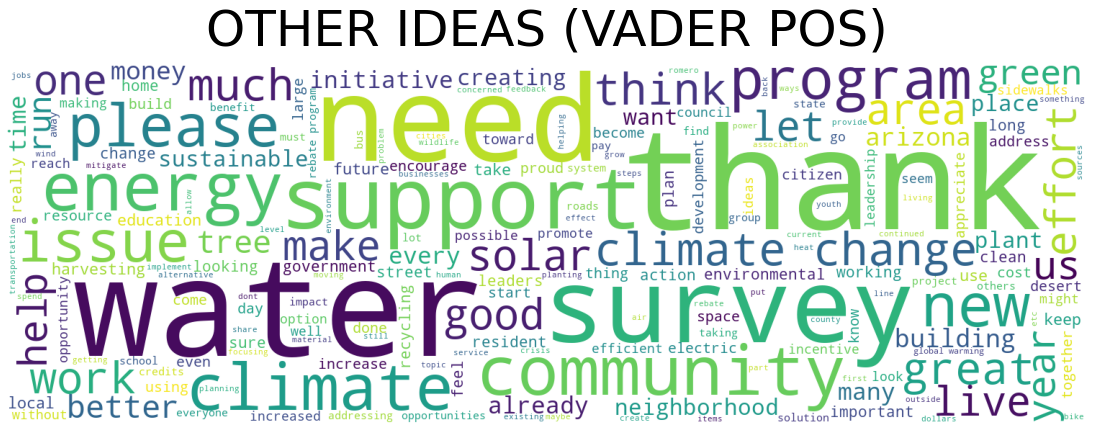

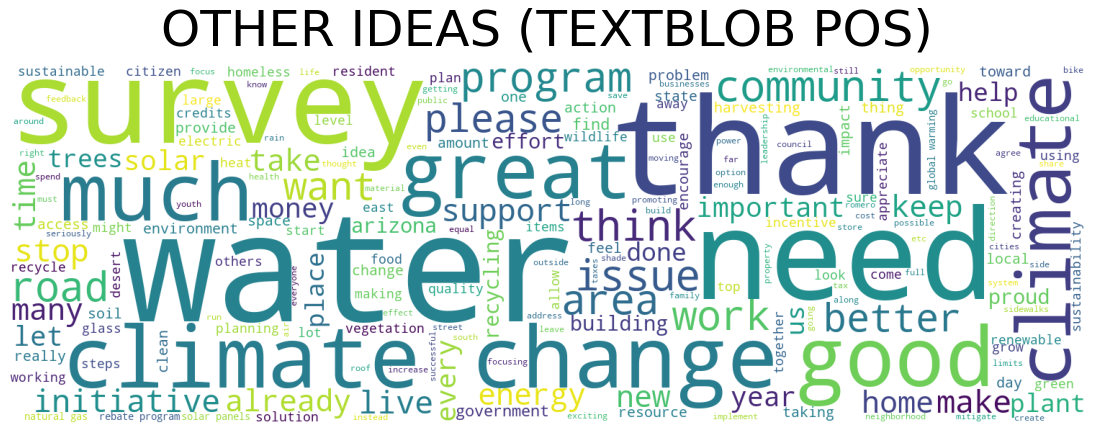

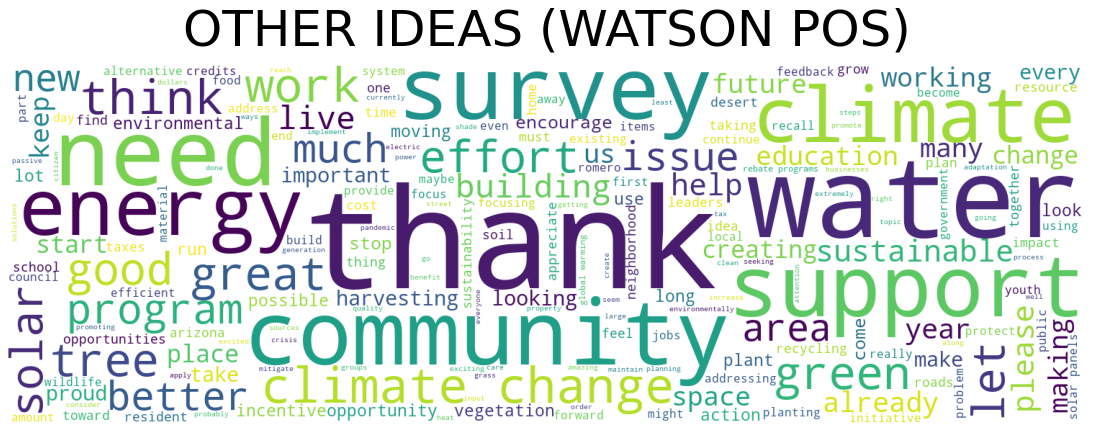

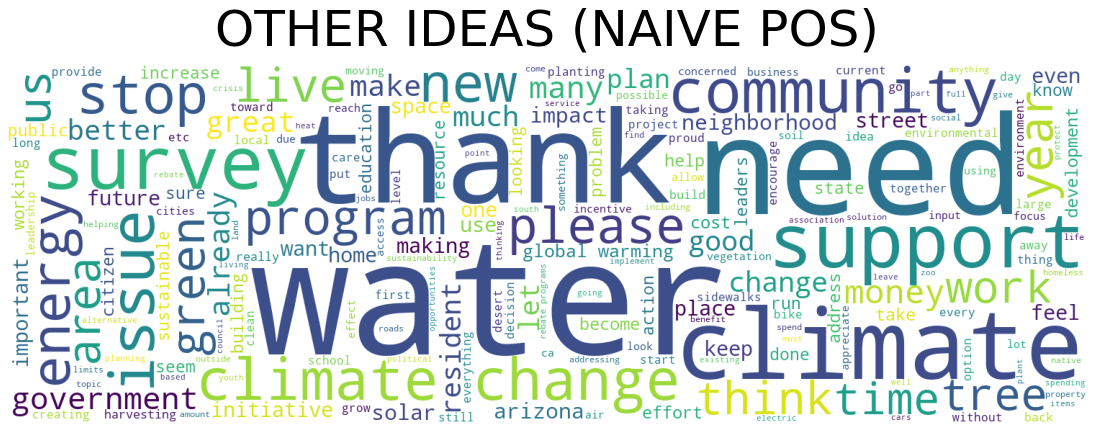

In [41]:
generate_sentiment_word_cloud(result_vader[0], 'OTHER IDEAS (VADER POS)')
generate_sentiment_word_cloud(result_textblob[0], 'OTHER IDEAS (TEXTBLOB POS)')
generate_sentiment_word_cloud(result_watson[0], 'OTHER IDEAS (WATSON POS)')
generate_sentiment_word_cloud(result_textnaive[0], 'OTHER IDEAS (NAIVE POS)')

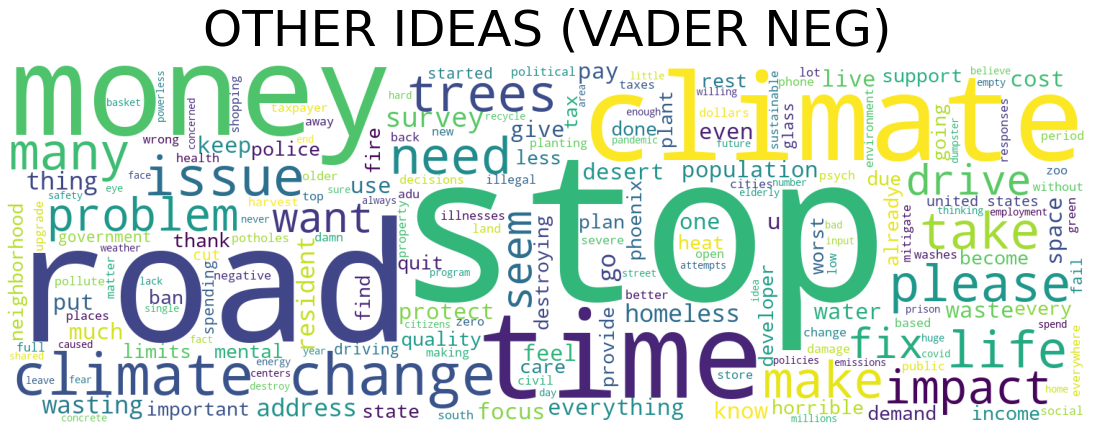

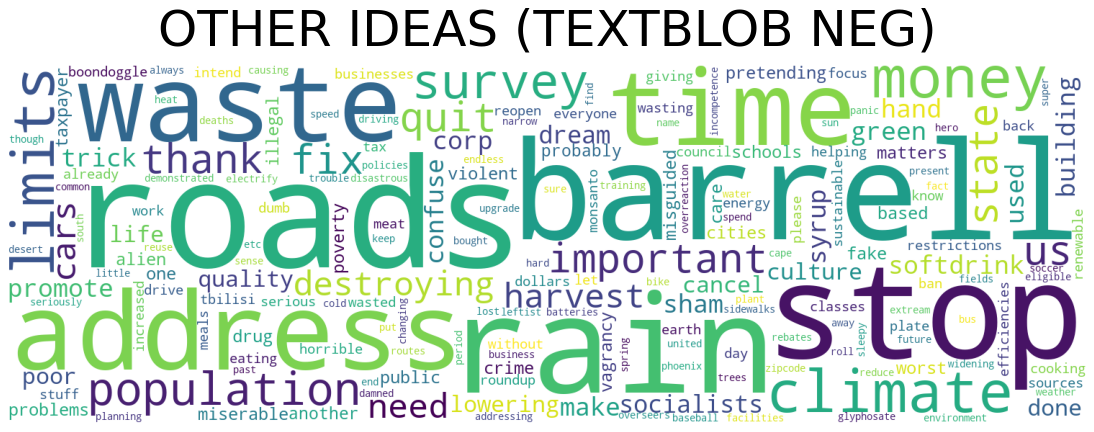

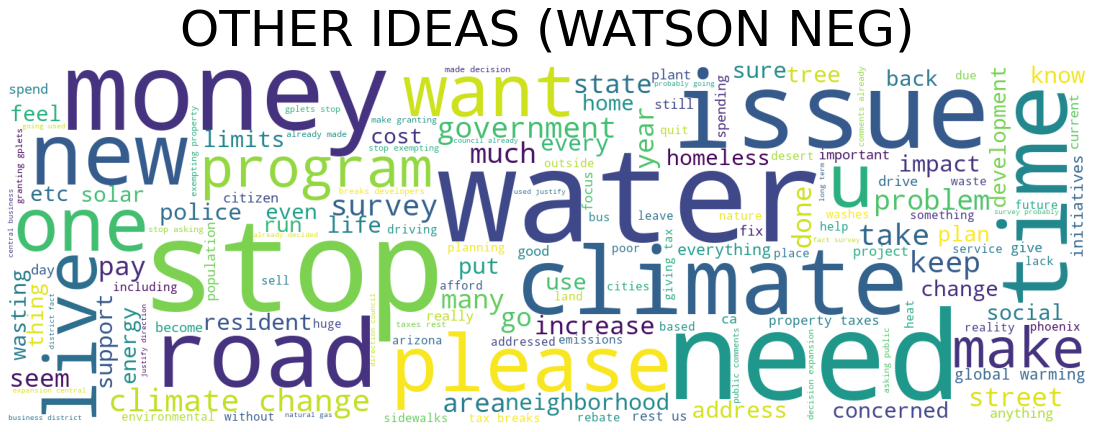

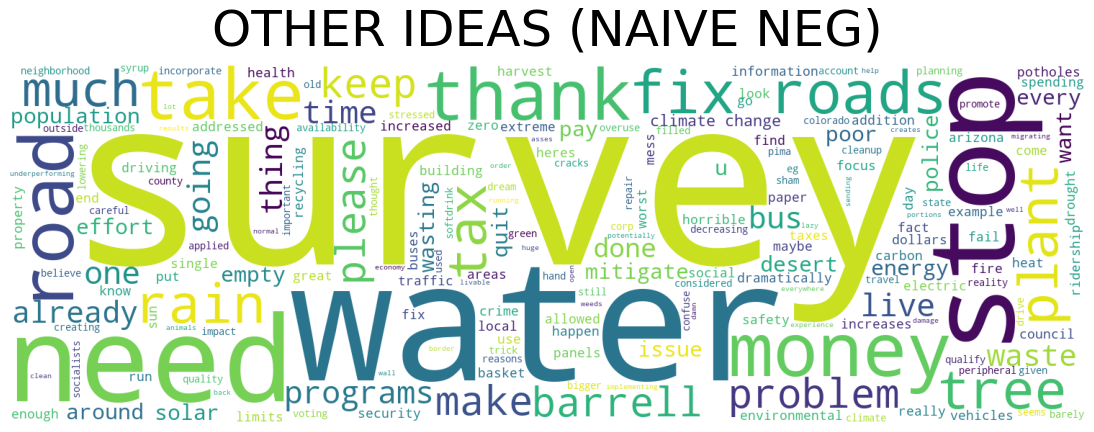

In [42]:
generate_sentiment_word_cloud(result_vader[1], 'OTHER IDEAS (VADER NEG)')
generate_sentiment_word_cloud(result_textblob[1], 'OTHER IDEAS (TEXTBLOB NEG)')
generate_sentiment_word_cloud(result_watson[1], 'OTHER IDEAS (WATSON NEG)')
generate_sentiment_word_cloud(result_textnaive[1], 'OTHER IDEAS (NAIVE NEG)')

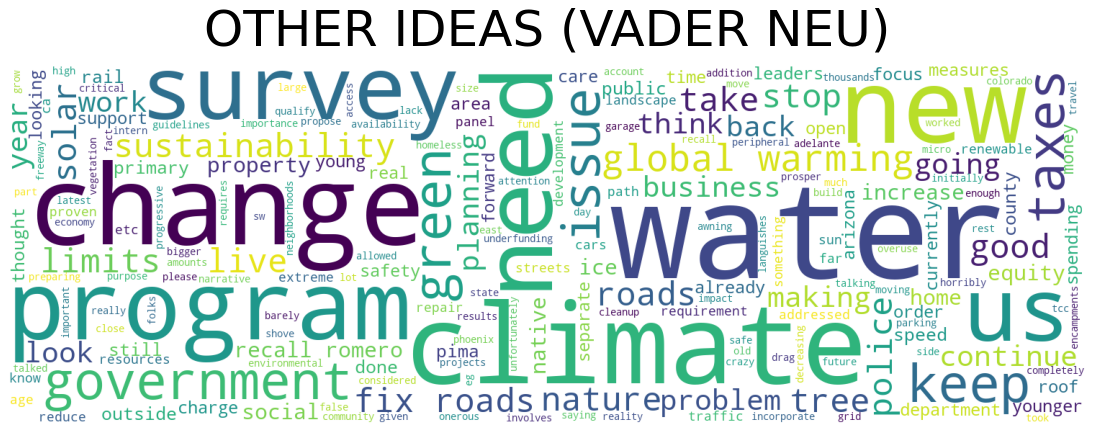

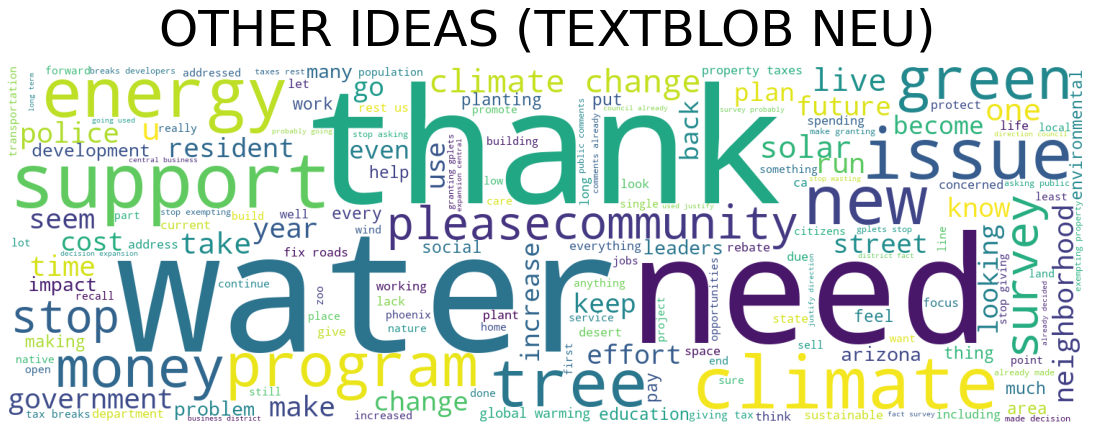

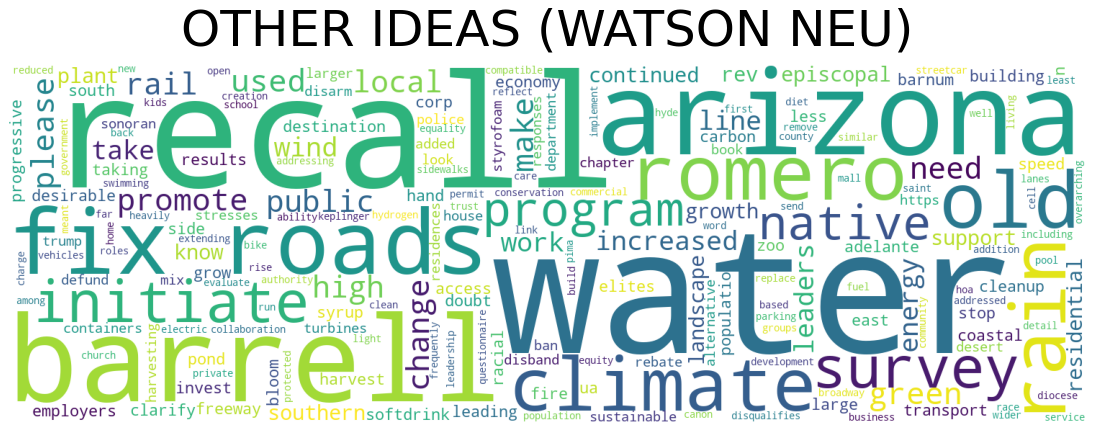

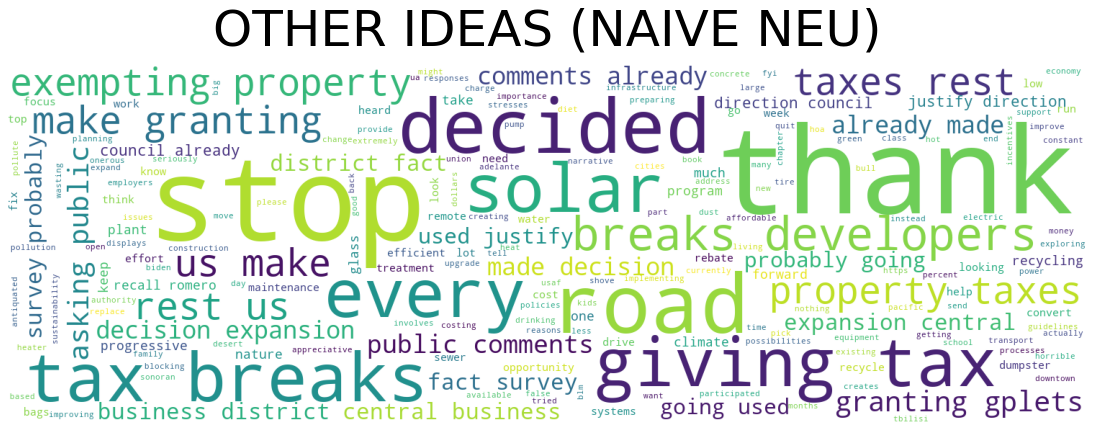

In [43]:
generate_sentiment_word_cloud(result_vader[2], 'OTHER IDEAS (VADER NEU)')
generate_sentiment_word_cloud(result_textblob[2], 'OTHER IDEAS (TEXTBLOB NEU)')
generate_sentiment_word_cloud(result_watson[2], 'OTHER IDEAS (WATSON NEU)')
generate_sentiment_word_cloud(result_textnaive[2], 'OTHER IDEAS (NAIVE NEU)')

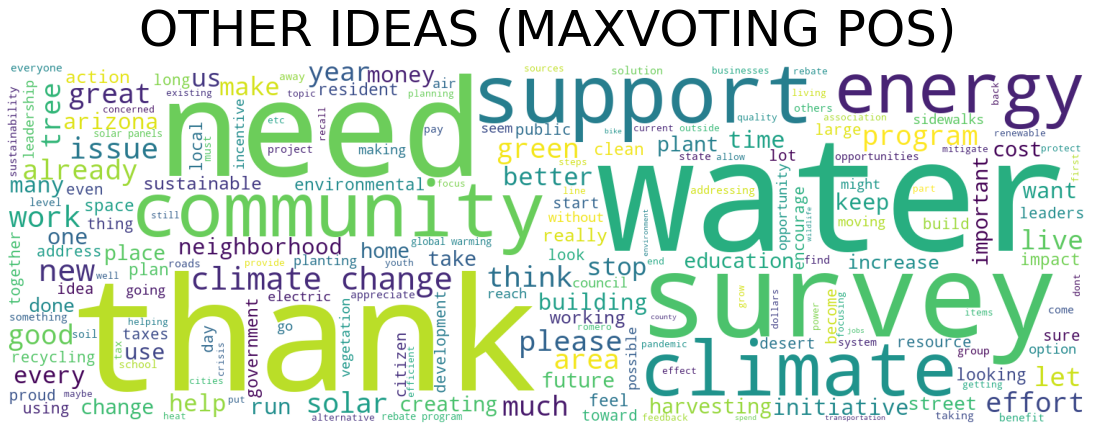

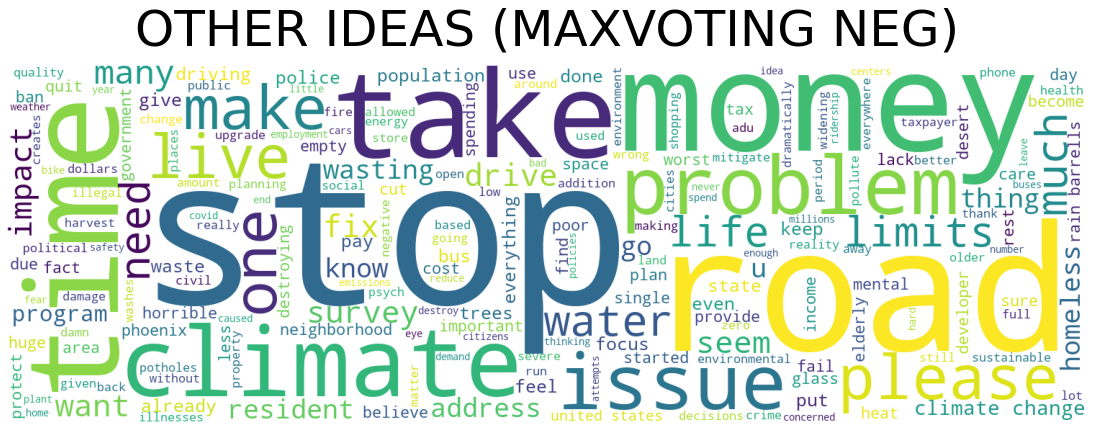

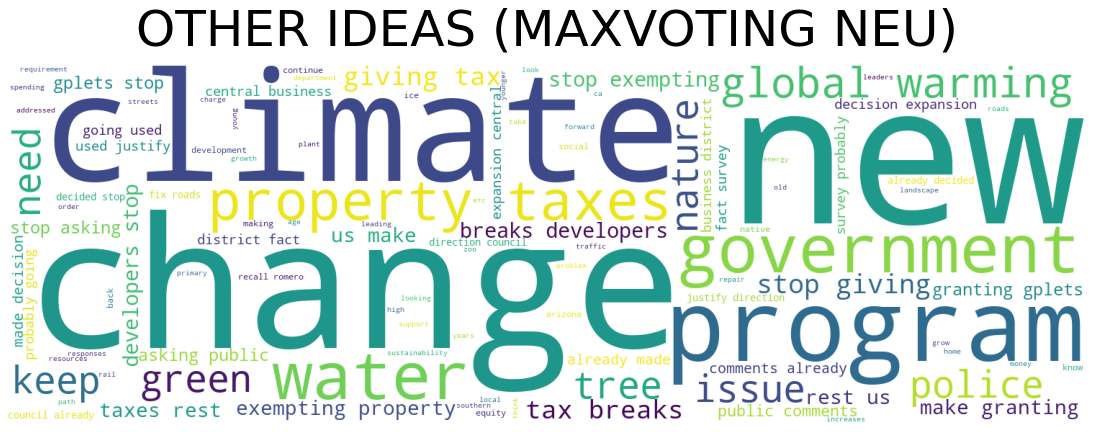

In [55]:
generate_sentiment_word_cloud(mv_pos, 'OTHER IDEAS (MAXVOTING POS)')
generate_sentiment_word_cloud(mv_neg, 'OTHER IDEAS (MAXVOTING NEG)')
generate_sentiment_word_cloud(mv_neu, 'OTHER IDEAS (MAXVOTING NEU)')

In [150]:
# CountVectorizer - LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer


def train_logistic_regression():
    data = []
    data_labels = []

    with open("./pos_tweets.txt") as f:
        for i in f: 
            data.append(i) 
            data_labels.append('pos')

    with open("./neg_tweets.txt") as f:
        for i in f: 
            data.append(i)
            data_labels.append('neg')

    vectorizer = CountVectorizer(analyzer = 'word', lowercase = False)
    features = vectorizer.fit_transform(data)
    features_nd = features.toarray() # for easy usage

    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test  = train_test_split(
            features_nd,
            data_labels,
            train_size=0.80, 
            random_state=1234)

    from sklearn.linear_model import LogisticRegression
    log_model = LogisticRegression()
    log_model = log_model.fit(X=X_train, y=y_train)
    #y_pred = log_model.predict(X_test)
    #from sklearn.metrics import accuracy_score
    #print(accuracy_score(y_test, y_pred))
    return log_model

In [157]:
model = train_logistic_regression()

df_tmp2 = get_column_clean_copy(df_tmp, 'other_ideas')


features = vectorizer.fit_transform(
    [str(r) for r in df_tmp2.values.tolist()]
)


features_nd = features.toarray()

y_pred = model.predict(features_nd)
#y_pred

ValueError: X has 2739 features per sample; expecting 6165

In [124]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {len(y_train)}')
print(f'X_test: {X_test.shape}')
print(f'Survey: {features_nd.shape}')

X_train: (1603, 6165)
y_train: 1603
X_test: (401, 6165)
Survey: (2316, 7919)
